# Séance 2: Apprentissage Supervisé - Classification

::: {.callout-note icon=false}
## Informations de la séance
- **Type**: Cours
- **Durée**: 2h
- **Objectifs**: Obj5, Obj6
:::

## 1. Introduction à la Classification

### 1.1 Définition

La **classification** est une tâche d'apprentissage supervisé où l'objectif est de prédire une **classe** ou **catégorie** discrète à partir de caractéristiques d'entrée.

::: {.callout-note}
## Exemple
**Entrée**: Caractéristiques d'un email (mots, expéditeur, longueur, etc.)  
**Sortie**: Classe = "Spam" ou "Non Spam"
:::

### 1.2 Différence Classification vs Régression

| Caractéristique | Classification | Régression |
|----------------|----------------|------------|
| **Sortie** | Catégorie discrète | Valeur continue |
| **Exemple** | Spam/Non spam | Prix d'une maison |
| **Métrique** | Accuracy, F1-score | MAE, RMSE |
| **Fonction** | Probabilité → Classe | Valeur numérique |

## 2. Types de Classification

### 2.1 Classification Binaire

Deux classes possibles: 0 ou 1, Vrai ou Faux, Positif ou Négatif

**Exemples**:
- Détection de spam (spam/non spam)
- Diagnostic médical (malade/sain)
- Détection de fraude (fraude/légitime)
- Approbation de crédit (approuvé/rejeté)

In [1]:
# Exemple: Classification binaire
y_binary = [0, 1, 1, 0, 1, 0, 0, 1]  # 0 = négatif, 1 = positif

### 2.2 Classification Multi-classes

Plus de deux classes **mutuellement exclusives** (une seule classe par instance)

**Exemples**:
- Reconnaissance de chiffres manuscrits (0-9 = 10 classes)
- Classification de fleurs Iris (Setosa, Versicolor, Virginica)
- Catégorisation d'articles (Sport, Politique, Économie, Culture)

In [2]:
# Exemple: Classification multi-classes
y_multiclass = [0, 1, 2, 1, 0, 2, 1]  # 3 classes: 0, 1, 2

### 2.3 Classification Multi-label

Plusieurs classes **simultanées** possibles pour une instance

**Exemples**:
- Étiquetage de photos (peut contenir: personne, chien, extérieur)
- Catégorisation de films (peut être: Action, Comédie, Drame)
- Analyse de sentiments multiple (joie + surprise)

In [3]:
# Exemple: Classification multi-label
y_multilabel = [
    [1, 0, 1],  # instance a les labels 0 et 2
    [0, 1, 1],  # instance a les labels 1 et 2
    [1, 1, 0]   # instance a les labels 0 et 1
]

## 3. Algorithmes de Classification

### 3.1 Arbre de Décision (Decision Tree)

Modèle qui prend des décisions basées sur des questions successives.

#### Principe

L'arbre divise l'espace des caractéristiques en régions par des questions binaires.

```mermaid
graph TD
    A[Age > 30?] -->|Oui| B[Revenu > 50k?]
    A -->|Non| C[Étudiant?]
    B -->|Oui| D[Approuvé ✓]
    B -->|Non| E[Rejeté ✗]
    C -->|Oui| F[Rejeté ✗]
    C -->|Non| G[Approuvé ✓]
```

#### Avantages
- Facile à interpréter et visualiser
- Pas besoin de normalisation des données
- Gère les données non linéaires
- Gère les variables catégorielles et numériques

#### Inconvénients
- Tendance à l'overfitting
- Instable (petits changements de données → arbre différent)
- Biais vers les classes majoritaires

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Chargement des données
iris = load_iris()
X, y = iris.data, iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entraînement
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Prédiction
y_pred = clf.predict(X_test)
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")

Accuracy: 1.00


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split initial
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fonction principale d'entraînement et d'évaluation
def train_and_evaluate(max_depth=3, random_state=42):
    """Entraîne et évalue un arbre de décision avec les paramètres donnés"""
    
    # Entraînement
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    clf.fit(X_train, y_train)
    
    # Prédiction
    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    
    return clf, y_pred, accuracy

# Fonction pour tester sur un exemple manuel
def predict_manual_example(model, sepal_length, sepal_width, petal_length, petal_width):
    """Prédit la classe d'une fleur basée sur ses caractéristiques"""
    example = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = model.predict(example)[0]
    probabilities = model.predict_proba(example)[0]
    
    return prediction, probabilities

# Création des widgets
max_depth_slider = widgets.IntSlider(
    value=3,
    min=1,
    max=10,
    step=1,
    description='Profondeur max:',
    style={'description_width': 'initial'}
)

random_state_slider = widgets.IntSlider(
    value=42,
    min=0,
    max=100,
    step=1,
    description='Random state:',
    style={'description_width': 'initial'}
)

# Widgets pour les caractéristiques manuelles
sepal_length_slider = widgets.FloatSlider(
    value=5.0,
    min=4.0,
    max=8.0,
    step=0.1,
    description='Sepal Length (cm):',
    style={'description_width': 'initial'}
)

sepal_width_slider = widgets.FloatSlider(
    value=3.0,
    min=2.0,
    max=4.5,
    step=0.1,
    description='Sepal Width (cm):',
    style={'description_width': 'initial'}
)

petal_length_slider = widgets.FloatSlider(
    value=1.5,
    min=0.0,
    max=7.0,
    step=0.1,
    description='Petal Length (cm):',
    style={'description_width': 'initial'}
)

petal_width_slider = widgets.FloatSlider(
    value=0.2,
    min=0.0,
    max=2.5,
    step=0.1,
    description='Petal Width (cm):',
    style={'description_width': 'initial'}
)

# Boutons
train_button = widgets.Button(
    description='Entraîner et Évaluer',
    button_style='primary',
    icon='play'
)

predict_button = widgets.Button(
    description='Prédire sur l\'exemple',
    button_style='success',
    icon='magic'
)

reset_button = widgets.Button(
    description='Réinitialiser',
    button_style='warning',
    icon='refresh'
)

# Zone d'affichage
output = widgets.Output()

# Conteneurs pour l'organisation
params_box = widgets.VBox([
    widgets.HTML("<h3>Paramètres du Modèle</h3>"),
    max_depth_slider,
    random_state_slider,
    train_button,
    widgets.HTML("<hr>"),
    widgets.HTML("<h3>Caractéristiques de la Fleur</h3>"),
    sepal_length_slider,
    sepal_width_slider,
    petal_length_slider,
    petal_width_slider,
    predict_button,
    reset_button
])

# Variables globales
current_model = None
current_accuracy = None

# Fonction de rappel pour l'entraînement
def on_train_button_clicked(b):
    global current_model, current_accuracy
    
    with output:
        clear_output(wait=True)
        
        print("🔧 Entraînement en cours...")
        current_model, y_pred, current_accuracy = train_and_evaluate(
            max_depth=max_depth_slider.value,
            random_state=random_state_slider.value
        )
        
        print("✅ Entraînement terminé!")
        print(f"\n📊 Paramètres utilisés:")
        print(f"   • Profondeur max: {max_depth_slider.value}")
        print(f"   • Random state: {random_state_slider.value}")
        
        print(f"\n🎯 Accuracy sur le test set: {current_accuracy:.4f} ({current_accuracy*100:.1f}%)")
        
        # Rapport de classification
        print(f"\n📋 Rapport de Classification:")
        report = classification_report(y_test, y_pred, target_names=target_names, output_dict=False)
        print(report)
        
        # Matrice de confusion
        cm = confusion_matrix(y_test, y_pred)
        
        # Affichage graphique
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Arbre de décision
        plot_tree(current_model, 
                  feature_names=feature_names,
                  class_names=target_names,
                  filled=True, 
                  rounded=True,
                  ax=axes[0])
        axes[0].set_title(f'Arbre de Décision (Profondeur max: {max_depth_slider.value})')
        
        # Matrice de confusion
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=target_names,
                   yticklabels=target_names,
                   ax=axes[1])
        axes[1].set_xlabel('Prédiction')
        axes[1].set_ylabel('Vérité')
        axes[1].set_title('Matrice de Confusion')
        
        plt.tight_layout()
        plt.show()

# Fonction de rappel pour la prédiction
def on_predict_button_clicked(b):
    with output:
        clear_output(wait=True)
        
        if current_model is None:
            print("⚠️ Veuillez d'abord entraîner le modèle!")
            return
            
        # Récupération des valeurs
        sl = sepal_length_slider.value
        sw = sepal_width_slider.value
        pl = petal_length_slider.value
        pw = petal_width_slider.value
        
        print(f"🌺 Caractéristiques de la fleur:")
        print(f"   • Sepal Length: {sl} cm")
        print(f"   • Sepal Width: {sw} cm")
        print(f"   • Petal Length: {pl} cm")
        print(f"   • Petal Width: {pw} cm")
        
        # Prédiction
        prediction, probabilities = predict_manual_example(current_model, sl, sw, pl, pw)
        
        print(f"\n🔮 Prédiction:")
        print(f"   → Classe: {target_names[prediction]}")
        
        print(f"\n📈 Probabilités par classe:")
        for i, prob in enumerate(probabilities):
            bar = "█" * int(prob * 20)
            print(f"   • {target_names[i]}: {prob:.3f} {bar}")
        
        # Visualisation dans l'espace des features
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Feature 1 vs Feature 2 (Sepal)
        scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, s=20)
        axes[0].scatter(sl, sw, c='red', s=100, marker='*', edgecolor='black', linewidth=2)
        axes[0].set_xlabel(feature_names[0])
        axes[0].set_ylabel(feature_names[1])
        axes[0].set_title('Sepal Length vs Sepal Width')
        axes[0].legend(handles=[plt.Line2D([0], [0], marker='*', color='w', 
                                         markerfacecolor='red', markersize=10,
                                         label='Notre fleur')])
        
        # Feature 3 vs Feature 4 (Petal)
        scatter2 = axes[1].scatter(X[:, 2], X[:, 3], c=y, cmap='viridis', alpha=0.6, s=20)
        axes[1].scatter(pl, pw, c='red', s=100, marker='*', edgecolor='black', linewidth=2)
        axes[1].set_xlabel(feature_names[2])
        axes[1].set_ylabel(feature_names[3])
        axes[1].set_title('Petal Length vs Petal Width')
        
        plt.colorbar(scatter1, ax=axes[0], label='Classe')
        plt.colorbar(scatter2, ax=axes[1], label='Classe')
        plt.tight_layout()
        plt.show()

# Fonction de réinitialisation
def on_reset_button_clicked(b):
    max_depth_slider.value = 3
    random_state_slider.value = 42
    sepal_length_slider.value = 5.0
    sepal_width_slider.value = 3.0
    petal_length_slider.value = 1.5
    petal_width_slider.value = 0.2
    
    with output:
        clear_output()
        print("🔄 Paramètres réinitialisés!")
        print("🔸 Profondeur max: 3")
        print("🔸 Random state: 42")
        print("🔸 Exemple fleur réinitialisé aux valeurs moyennes")

# Assignation des fonctions de rappel
train_button.on_click(on_train_button_clicked)
predict_button.on_click(on_predict_button_clicked)
reset_button.on_click(on_reset_button_clicked)

# Interface principale
display(widgets.HTML("<h1>🌷 Classificateur d'Iris avec Arbre de Décision</h1>"))
display(widgets.HTML("<p>Cette interface permet d'entraîner un modèle et de tester des prédictions sur des exemples manuels.</p>"))

# Affichage des statistiques du dataset
display(widgets.HTML(f"""
<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; margin: 10px 0;'>
<h3>📊 Statistiques du Dataset Iris</h3>
<ul>
<li>📈 Nombre total d'échantillons: {len(X)}</li>
<li>🎯 Classes: {', '.join(target_names)}</li>
<li>📏 Features: {', '.join(feature_names)}</li>
<li>🧠 Train set: {len(X_train)} échantillons</li>
<li>📝 Test set: {len(X_test)} échantillons</li>
</ul>
</div>
"""))

# Layout principal
main_layout = widgets.HBox([params_box, output])
display(main_layout)

# Instructions
display(widgets.HTML("""
<div style='background-color: #fff3cd; padding: 10px; border-radius: 5px; margin: 10px 0; border: 1px solid #ffeaa7;'>
<h3>📋 Instructions:</h3>
<ol>
<li>📌 Ajustez les <strong>Paramètres du Modèle</strong> (profondeur et random state)</li>
<li>🔧 Cliquez sur <strong>Entraîner et Évaluer</strong> pour créer le modèle</li>
<li>🌺 Modifiez les <strong>Caractéristiques de la Fleur</strong> avec les curseurs</li>
<li>🔮 Cliquez sur <strong>Prédire sur l'exemple</strong> pour voir la prédiction</li>
<li>🔄 Utilisez <strong>Réinitialiser</strong> pour revenir aux valeurs par défaut</li>
</ol>
</div>
"""))

# Exemples prédéfinis
examples_box = widgets.VBox([
    widgets.HTML("<h3>🌺 Exemples Prédéfinis</h3>"),
    widgets.HTML("<p>Sélectionnez un exemple pour remplir automatiquement les caractéristiques:</p>"),
    widgets.HBox([
        widgets.Button(
            description='Setosa typique',
            button_style='info',
            layout=widgets.Layout(width='150px')
        ),
        widgets.Button(
            description='Versicolor typique',
            button_style='info',
            layout=widgets.Layout(width='150px')
        ),
        widgets.Button(
            description='Virginica typique',
            button_style='info',
            layout=widgets.Layout(width='150px')
        )
    ])
])

def on_example_button_clicked(b, example_type):
    if example_type == 'setosa':
        sepal_length_slider.value = 5.0
        sepal_width_slider.value = 3.5
        petal_length_slider.value = 1.4
        petal_width_slider.value = 0.2
    elif example_type == 'versicolor':
        sepal_length_slider.value = 6.0
        sepal_width_slider.value = 2.8
        petal_length_slider.value = 4.5
        petal_width_slider.value = 1.5
    elif example_type == 'virginica':
        sepal_length_slider.value = 6.5
        sepal_width_slider.value = 3.0
        petal_length_slider.value = 5.5
        petal_width_slider.value = 2.0
    
    with output:
        clear_output(wait=True)
        print(f"✅ Exemple {example_type} chargé!")

# Configuration des boutons d'exemples
example_buttons = examples_box.children[2].children
example_buttons[0].on_click(lambda b: on_example_button_clicked(b, 'setosa'))
example_buttons[1].on_click(lambda b: on_example_button_clicked(b, 'versicolor'))
example_buttons[2].on_click(lambda b: on_example_button_clicked(b, 'virginica'))

display(examples_box)

# Entraînement initial automatique
with output:
    print("🎯 Interface prête!")
    print("Cliquez sur 'Entraîner et Évaluer' pour commencer ou utilisez les boutons d'exemples prédéfinis.")

HTML(value="<h1>🌷 Classificateur d'Iris avec Arbre de Décision</h1>")

HTML(value="<p>Cette interface permet d'entraîner un modèle et de tester des prédictions sur des exemples manu…

HTML(value="\n<div style='background-color: #f0f8ff; padding: 10px; border-radius: 5px; margin: 10px 0;'>\n<h3…

HTML(value="\n<div style='background-color: #fff3cd; padding: 10px; border-radius: 5px; margin: 10px 0; border…

### 3.2 Random Forest

Ensemble d'arbres de décision qui votent ensemble.

#### Principe

1. Créer N arbres sur des sous-ensembles aléatoires de données
2. Chaque arbre vote pour une classe
3. Prédiction finale = vote majoritaire

#### Avantages
- Très performant et robuste
- Réduit l'overfitting par rapport à un arbre unique
- Gère bien les grandes dimensions
- Donne l'importance des features

#### Inconvénients
- Moins interprétable qu'un arbre unique
- Plus lent à entraîner et prédire
- Mémoire importante

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

# Prédiction
y_pred = rf.predict(X_test)
print(f"Accuracy: {rf.score(X_test, y_test):.2f}")

# Importance des features
importances = rf.feature_importances_
for i, imp in enumerate(importances):
    print(f"Feature {iris.feature_names[i]}: {imp:.3f}")

Accuracy: 1.00
Feature sepal length (cm): 0.106
Feature sepal width (cm): 0.010
Feature petal length (cm): 0.452
Feature petal width (cm): 0.432


### 3.3 Support Vector Machine (SVM)

Trouve l'hyperplan optimal qui sépare les classes avec la marge maximale.

#### Principe

- **Marge**: distance entre l'hyperplan et les points les plus proches (vecteurs de support)
- **Objectif**: Maximiser cette marge
- **Kernel trick**: Permet de gérer des données non linéairement séparables

In [6]:
from sklearn.svm import SVC

# SVM linéaire
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

# SVM avec kernel RBF (pour données non linéaires)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

print(f"SVM Linear Accuracy: {svm_linear.score(X_test, y_test):.2f}")
print(f"SVM RBF Accuracy: {svm_rbf.score(X_test, y_test):.2f}")

SVM Linear Accuracy: 1.00
SVM RBF Accuracy: 1.00


#### Avantages
- Très efficace en haute dimension
- Robuste aux outliers
- Versatile (différents kernels)

#### Inconvénients
- Lent sur de grandes données
- Difficile à interpréter
- Sensible au choix des hyperparamètres

### 3.4 Naïve Bayes

Basé sur le théorème de Bayes avec hypothèse d'indépendance des features.

#### Principe - Théorème de Bayes

$$P(y|X) = \frac{P(X|y) \cdot P(y)}{P(X)}$$

Où:
- $P(y|X)$ = probabilité de la classe $y$ sachant les features $X$ (posterior)
- $P(X|y)$ = vraisemblance
- $P(y)$ = probabilité a priori de la classe
- $P(X)$ = évidence (constante)

#### Hypothèse "Naïve"

Les features sont **indépendantes** conditionnellement à la classe:

$$P(X|y) = P(x_1|y) \cdot P(x_2|y) \cdot ... \cdot P(x_n|y)$$

In [7]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Gaussian Naive Bayes (pour features continues)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print(f"Gaussian NB Accuracy: {gnb.score(X_test, y_test):.2f}")

# Multinomial NB (pour comptages, ex: mots dans un texte)
# mnb = MultinomialNB()
# mnb.fit(X_train_counts, y_train)

Gaussian NB Accuracy: 1.00


#### Avantages
- Très rapide (entraînement et prédiction)
- Fonctionne bien avec peu de données
- Excellent pour la classification de texte

#### Inconvénients
- Hypothèse d'indépendance rarement vraie
- Performance limitée si hypothèse violée

### 3.5 Régression Logistique

**Attention**: Malgré son nom, c'est un algorithme de **classification** !

#### Principe

Modèle linéaire qui utilise la fonction sigmoïde pour produire des probabilités.

**Fonction sigmoïde**:
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Modèle**:
$$P(y=1|X) = \sigma(w^T X + b) = \frac{1}{1 + e^{-(w^T X + b)}}$$

#### Interprétation Probabiliste

- Sortie $\in [0, 1]$ : probabilité d'appartenance à la classe positive
- Si $P(y=1|X) \geq 0.5$ → prédiction = classe 1
- Si $P(y=1|X) < 0.5$ → prédiction = classe 0

In [8]:
from sklearn.linear_model import LogisticRegression

# Entraînement
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Prédiction de classes
y_pred = log_reg.predict(X_test)

# Prédiction de probabilités
y_proba = log_reg.predict_proba(X_test)

print(f"Accuracy: {log_reg.score(X_test, y_test):.2f}")
print(f"\nPremière prédiction:")
print(f"  Probabilités: {y_proba[0]}")
print(f"  Classe prédite: {y_pred[0]}")

Accuracy: 1.00

Première prédiction:
  Probabilités: [0.00380344 0.82773956 0.168457  ]
  Classe prédite: 1


#### Avantages
- Simple et interprétable
- Donne des probabilités (utile pour la prise de décision)
- Peu de paramètres à ajuster
- Fonctionne bien sur données linéairement séparables

#### Inconvénients
- Assume une relation linéaire
- Sensible aux outliers
- Nécessite feature engineering pour les relations non linéaires

### 3.6 k-Nearest Neighbors (k-NN)

Classification basée sur la proximité avec les voisins.

#### Principe

1. Calculer la distance entre le nouveau point et tous les points d'entraînement
2. Sélectionner les k points les plus proches
3. Vote majoritaire parmi ces k voisins

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# k=5 voisins
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print(f"k-NN Accuracy: {knn.score(X_test, y_test):.2f}")

k-NN Accuracy: 1.00


#### Avantages
- Simple et intuitif
- Pas d'entraînement (lazy learning)
- Fonctionne bien pour des frontières complexes

#### Inconvénients
- Lent pour la prédiction (calcule toutes les distances)
- Sensible à l'échelle des features (nécessite normalisation)
- Curse of dimensionality (mauvais en haute dimension)

## 4. Critères d'Évaluation (Aperçu)

### 4.1 Métriques Principales

- **Accuracy**: Proportion de prédictions correctes
- **Precision**: Proportion de vrais positifs parmi les prédictions positives
- **Recall**: Proportion de vrais positifs parmi les cas réellement positifs
- **F1-Score**: Moyenne harmonique de Precision et Recall

::: {.callout-important}
Ces métriques seront détaillées en profondeur dans la **Séance 5 - TD2**
:::

### 4.2 Exemple Simple

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Rapport complet
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 5. Exemple Complet: Comparaison d'Algorithmes

Decision Tree       : 0.9150
Random Forest       : 0.9300
SVM                 : 0.9400
Logistic Regression : 0.9000
Naive Bayes         : 0.9050
k-NN                : 0.9250


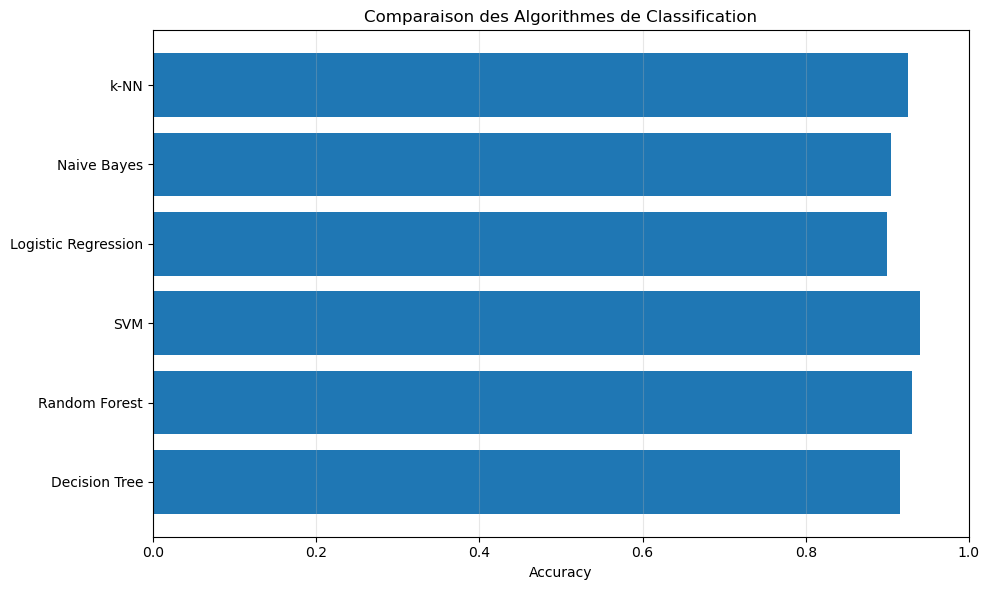

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Création d'un dataset synthétique
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Split et normalisation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement de plusieurs modèles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

# Comparaison des performances
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    results[name] = score
    print(f"{name:20s}: {score:.4f}")

# Visualisation
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()))
plt.xlabel('Accuracy')
plt.title('Comparaison des Algorithmes de Classification')
plt.xlim([0, 1])
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Résumé de la Séance

::: {.callout-important icon=false}
## Points clés à retenir

1. **Classification** = prédire une catégorie discrète
2. **Types**: Binaire, Multi-classes, Multi-label
3. **Algorithmes principaux**:
   - Decision Tree: interprétable mais tendance à l'overfitting
   - Random Forest: robuste et performant
   - SVM: excellent en haute dimension
   - Naïve Bayes: rapide, bon pour le texte
   - Régression Logistique: simple, interprétable, probabiliste
   - k-NN: simple mais coûteux en prédiction
4. **Choix du modèle** dépend de: taille des données, interprétabilité, performance, ressources
5. **Évaluation** avec métriques appropriées (détails en TD2)
:::

## Exercices

::: {.callout-warning icon=false}
## Exercice 1
Implémentez une régression logistique sur le dataset Iris et analysez les coefficients appris. Que représentent-ils?
:::

::: {.callout-warning icon=false}
## Exercice 2
Comparez les performances de Decision Tree vs Random Forest sur le dataset digits de sklearn. Expliquez les différences observées.
:::

::: {.callout-warning icon=false}
## Exercice 3
Pour un problème de détection de fraude bancaire, quel algorithme recommanderiez-vous et pourquoi? Considérez les aspects: interprétabilité, temps réel, déséquilibre des classes.
:::

## Lectures Complémentaires

1. Géron, A. (2019) - Chapitre 3: Classification
2. Scikit-learn Documentation: [Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
3. [StatQuest: Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, precision_score, recall_score, f1_score)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Chargement des données
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split des données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardisation (important pour SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation des modèles
models = {
    "Arbre de Décision": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True)
}

# Variables globales
current_models = {}
current_predictions = {}
current_accuracies = {}
current_metrics = {}

# Fonction pour entraîner tous les modèles
def train_all_models(tree_params, rf_params, svm_params):
    """Entraîne les trois modèles avec les paramètres donnés"""
    
    models_trained = {}
    predictions = {}
    accuracies = {}
    metrics = {}
    
    # 1. Arbre de Décision
    dt = DecisionTreeClassifier(
        max_depth=tree_params['max_depth'],
        min_samples_split=tree_params['min_samples_split'],
        min_samples_leaf=tree_params['min_samples_leaf'],
        random_state=42
    )
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    models_trained['Arbre de Décision'] = dt
    predictions['Arbre de Décision'] = y_pred_dt
    accuracies['Arbre de Décision'] = accuracy_score(y_test, y_pred_dt)
    metrics['Arbre de Décision'] = {
        'precision': precision_score(y_test, y_pred_dt, average='weighted'),
        'recall': recall_score(y_test, y_pred_dt, average='weighted'),
        'f1': f1_score(y_test, y_pred_dt, average='weighted')
    }
    
    # 2. Random Forest
    rf = RandomForestClassifier(
        n_estimators=rf_params['n_estimators'],
        max_depth=rf_params['max_depth'],
        min_samples_split=rf_params['min_samples_split'],
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    models_trained['Random Forest'] = rf
    predictions['Random Forest'] = y_pred_rf
    accuracies['Random Forest'] = accuracy_score(y_test, y_pred_rf)
    metrics['Random Forest'] = {
        'precision': precision_score(y_test, y_pred_rf, average='weighted'),
        'recall': recall_score(y_test, y_pred_rf, average='weighted'),
        'f1': f1_score(y_test, y_pred_rf, average='weighted')
    }
    
    # 3. SVM (nécessite scaling)
    svm = SVC(
        C=svm_params['C'],
        kernel=svm_params['kernel'],
        gamma=svm_params['gamma'],
        random_state=42,
        probability=True
    )
    svm.fit(X_train_scaled, y_train)
    y_pred_svm = svm.predict(X_test_scaled)
    models_trained['SVM'] = svm
    predictions['SVM'] = y_pred_svm
    accuracies['SVM'] = accuracy_score(y_test, y_pred_svm)
    metrics['SVM'] = {
        'precision': precision_score(y_test, y_pred_svm, average='weighted'),
        'recall': recall_score(y_test, y_pred_svm, average='weighted'),
        'f1': f1_score(y_test, y_pred_svm, average='weighted')
    }
    
    return models_trained, predictions, accuracies, metrics

# Fonction pour prédire avec tous les modèles
def predict_all_models(models_dict, sepal_length, sepal_width, petal_length, petal_width):
    """Prédit avec les trois modèles sur un exemple donné"""
    
    example = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    example_scaled = scaler.transform(example)
    
    predictions = {}
    probabilities = {}
    
    for name, model in models_dict.items():
        if name == 'SVM':
            pred = model.predict(example_scaled)[0]
            proba = model.predict_proba(example_scaled)[0]
        else:
            pred = model.predict(example)[0]
            proba = model.predict_proba(example)[0]
        
        predictions[name] = pred
        probabilities[name] = proba
    
    return predictions, probabilities

# ============ CRÉATION DES WIDGETS ============

# Titre principal
title = widgets.HTML("<h1>🌷 Comparaison de Modèles de Classification</h1>")
subtitle = widgets.HTML("<h3>Arbre de Décision vs Random Forest vs SVM</h3>")

# === Onglets pour les paramètres de chaque modèle ===
model_tabs = widgets.Tab()

# --- Onglet 1: Arbre de Décision ---
tree_max_depth = widgets.IntSlider(
    value=3, min=1, max=10, step=1,
    description='Profondeur max:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

tree_min_samples_split = widgets.IntSlider(
    value=2, min=2, max=20, step=1,
    description='Min samples split:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

tree_min_samples_leaf = widgets.IntSlider(
    value=1, min=1, max=10, step=1,
    description='Min samples leaf:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

tree_tab = widgets.VBox([
    widgets.HTML("<h4>Paramètres de l'Arbre de Décision</h4>"),
    tree_max_depth,
    tree_min_samples_split,
    tree_min_samples_leaf,
    widgets.HTML("""
    <div style='background-color: #e8f4f8; padding: 10px; border-radius: 5px; margin-top: 10px;'>
    <strong>Explications:</strong>
    <ul>
    <li><strong>Profondeur max</strong>: Limite la profondeur de l'arbre (évite l'overfitting)</li>
    <li><strong>Min samples split</strong>: Nombre minimum d'échantillons requis pour diviser un nœud</li>
    <li><strong>Min samples leaf</strong>: Nombre minimum d'échantillons dans une feuille</li>
    </ul>
    </div>
    """)
])

# --- Onglet 2: Random Forest ---
rf_n_estimators = widgets.IntSlider(
    value=100, min=10, max=200, step=10,
    description='Nombre d\'arbres:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

rf_max_depth = widgets.IntSlider(
    value=5, min=1, max=20, step=1,
    description='Profondeur max:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

rf_min_samples_split = widgets.IntSlider(
    value=2, min=2, max=20, step=1,
    description='Min samples split:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

rf_tab = widgets.VBox([
    widgets.HTML("<h4>Paramètres du Random Forest</h4>"),
    rf_n_estimators,
    rf_max_depth,
    rf_min_samples_split,
    widgets.HTML("""
    <div style='background-color: #e8f4f8; padding: 10px; border-radius: 5px; margin-top: 10px;'>
    <strong>Explications:</strong>
    <ul>
    <li><strong>Nombre d'arbres</strong>: Plus d'arbres améliore la stabilité mais augmente le temps de calcul</li>
    <li><strong>Profondeur max</strong>: Limite la profondeur de chaque arbre</li>
    <li><strong>Min samples split</strong>: Contrôle la division des nœuds</li>
    </ul>
    </div>
    """)
])

# --- Onglet 3: SVM ---
svm_C = widgets.FloatLogSlider(
    value=1.0, base=10, min=-2, max=3, step=0.1,
    description='Paramètre C:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

svm_kernel = widgets.Dropdown(
    options=['linear', 'rbf', 'poly', 'sigmoid'],
    value='rbf',
    description='Type de kernel:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

svm_gamma = widgets.Dropdown(
    options=['scale', 'auto'] + [f'{10**i}' for i in range(-4, 2)],
    value='scale',
    description='Paramètre gamma:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

svm_tab = widgets.VBox([
    widgets.HTML("<h4>Paramètres du SVM</h4>"),
    svm_C,
    svm_kernel,
    svm_gamma,
    widgets.HTML("""
    <div style='background-color: #e8f4f8; padding: 10px; border-radius: 5px; margin-top: 10px;'>
    <strong>Explications:</strong>
    <ul>
    <li><strong>C</strong>: Contrôle le compromis entre marge large et erreur d'entraînement</li>
    <li><strong>Kernel</strong>: Fonction pour transformer les données (rbf pour non-linéaire)</li>
    <li><strong>Gamma</strong>: Influence de chaque exemple (petit = influence large)</li>
    </ul>
    </div>
    """)
])

# Configuration des onglets
model_tabs.children = [tree_tab, rf_tab, svm_tab]
model_tabs.set_title(0, '🌳 Arbre')
model_tabs.set_title(1, '🌲 Random Forest')
model_tabs.set_title(2, '⚡ SVM')

# === Widgets pour les caractéristiques de la fleur ===
flower_title = widgets.HTML("<h3>🌺 Caractéristiques de la Fleur à Tester</h3>")

flower_params = widgets.VBox([
    widgets.FloatSlider(
        value=5.0, min=4.0, max=8.0, step=0.1,
        description='Sepal Length (cm):',
        style={'description_width': 'initial'}
    ),
    widgets.FloatSlider(
        value=3.0, min=2.0, max=4.5, step=0.1,
        description='Sepal Width (cm):',
        style={'description_width': 'initial'}
    ),
    widgets.FloatSlider(
        value=1.5, min=0.0, max=7.0, step=0.1,
        description='Petal Length (cm):',
        style={'description_width': 'initial'}
    ),
    widgets.FloatSlider(
        value=0.2, min=0.0, max=2.5, step=0.1,
        description='Petal Width (cm):',
        style={'description_width': 'initial'}
    )
])

# Boutons d'exemples prédéfinis
example_buttons = widgets.HBox([
    widgets.Button(
        description='Setosa Typique',
        button_style='info',
        tooltip='Sepal: 5.0x3.5, Petal: 1.4x0.2',
        layout=widgets.Layout(width='140px')
    ),
    widgets.Button(
        description='Versicolor Typique',
        button_style='info',
        tooltip='Sepal: 6.0x2.8, Petal: 4.5x1.5',
        layout=widgets.Layout(width='140px')
    ),
    widgets.Button(
        description='Virginica Typique',
        button_style='info',
        tooltip='Sepal: 6.5x3.0, Petal: 5.5x2.0',
        layout=widgets.Layout(width='140px')
    ),
    widgets.Button(
        description='Exemple Intermédiaire',
        button_style='warning',
        tooltip='Valeurs moyennes',
        layout=widgets.Layout(width='160px')
    )
])

# === Boutons d'action ===
action_buttons = widgets.HBox([
    widgets.Button(
        description='🚀 Entraîner Tous les Modèles',
        button_style='success',
        icon='rocket',
        layout=widgets.Layout(width='250px', height='40px')
    ),
    widgets.Button(
        description='🔮 Prédire avec les 3 Modèles',
        button_style='primary',
        icon='magic',
        layout=widgets.Layout(width='250px', height='40px')
    ),
    widgets.Button(
        description='🔄 Réinitialiser',
        button_style='warning',
        icon='refresh',
        layout=widgets.Layout(width='150px', height='40px')
    )
])

# === Zone d'affichage ===
output = widgets.Output(layout=widgets.Layout(
    width='100%',
    height='600px',
    overflow='auto'
))

# === Layout principal ===
left_panel = widgets.VBox([
    widgets.HTML("<h3>⚙️ Paramètres des Modèles</h3>"),
    model_tabs,
    widgets.HTML("<hr>"),
    flower_title,
    flower_params,
    widgets.HTML("<h4>Exemples Prédéfinis:</h4>"),
    example_buttons
], layout=widgets.Layout(width='45%'))

right_panel = widgets.VBox([
    action_buttons,
    output
], layout=widgets.Layout(width='55%'))

main_layout = widgets.HBox([left_panel, right_panel])

# ============ FONCTIONS DE RAPPEL ============

def on_train_button_clicked(b):
    global current_models, current_predictions, current_accuracies, current_metrics
    
    with output:
        clear_output(wait=True)
        
        print("⚙️ Entraînement des 3 modèles en cours...\n")
        
        # Récupération des paramètres
        tree_params = {
            'max_depth': tree_max_depth.value,
            'min_samples_split': tree_min_samples_split.value,
            'min_samples_leaf': tree_min_samples_leaf.value
        }
        
        rf_params = {
            'n_estimators': rf_n_estimators.value,
            'max_depth': rf_max_depth.value,
            'min_samples_split': rf_min_samples_split.value
        }
        
        svm_params = {
            'C': svm_C.value,
            'kernel': svm_kernel.value,
            'gamma': svm_gamma.value if svm_gamma.value in ['scale', 'auto'] else float(svm_gamma.value)
        }
        
        # Entraînement
        current_models, current_predictions, current_accuracies, current_metrics = train_all_models(
            tree_params, rf_params, svm_params
        )
        
        print("✅ Entraînement terminé!\n")
        
        # Affichage des résultats
        display_results()
        
        # Visualisations
        display_visualizations()

def on_predict_button_clicked(b):
    with output:
        clear_output(wait=True)
        
        if not current_models:
            print("⚠️ Veuillez d'abord entraîner les modèles!")
            return
        
        # Récupération des valeurs
        sl = flower_params.children[0].value
        sw = flower_params.children[1].value
        pl = flower_params.children[2].value
        pw = flower_params.children[3].value
        
        print(f"🌺 Caractéristiques de la fleur:")
        print(f"   • Sepal Length: {sl:.1f} cm")
        print(f"   • Sepal Width: {sw:.1f} cm")
        print(f"   • Petal Length: {pl:.1f} cm")
        print(f"   • Petal Width: {pw:.1f} cm")
        print()
        
        # Prédictions
        predictions, probabilities = predict_all_models(current_models, sl, sw, pl, pw)
        
        # Affichage des prédictions
        print("🔮 Prédictions des 3 modèles:")
        print("=" * 60)
        
        for model_name in predictions.keys():
            pred_class = predictions[model_name]
            proba = probabilities[model_name]
            
            print(f"\n{model_name}:")
            print(f"  → Classe prédite: {target_names[pred_class]}")
            print(f"  Probabilités:")
            for i, (class_name, prob) in enumerate(zip(target_names, proba)):
                bar_length = int(prob * 20)
                bar = "█" * bar_length
                print(f"    • {class_name}: {prob:.3f} {bar}")
        
        print("\n" + "=" * 60)
        
        # Analyse des accords/désaccords
        print("\n🤝 Analyse des accords:")
        unique_predictions = list(set(predictions.values()))
        if len(unique_predictions) == 1:
            print("  ✅ Tous les modèles sont d'accord!")
        else:
            print("  ⚠️ Les modèles ne sont pas tous d'accord:")
            for model_name, pred in predictions.items():
                print(f"    • {model_name}: {target_names[pred]}")
        
        # Visualisation de la prédiction
        display_prediction_visualization(sl, sw, pl, pw, predictions, probabilities)

def on_reset_button_clicked(b):
    # Réinitialisation des paramètres
    tree_max_depth.value = 3
    tree_min_samples_split.value = 2
    tree_min_samples_leaf.value = 1
    
    rf_n_estimators.value = 100
    rf_max_depth.value = 5
    rf_min_samples_split.value = 2
    
    svm_C.value = 1.0
    svm_kernel.value = 'rbf'
    svm_gamma.value = 'scale'
    
    # Réinitialisation des caractéristiques
    flower_params.children[0].value = 5.0
    flower_params.children[1].value = 3.0
    flower_params.children[2].value = 1.5
    flower_params.children[3].value = 0.2
    
    with output:
        clear_output()
        print("🔄 Tous les paramètres ont été réinitialisés!")
        print("\nParamètres par défaut:")
        print("• Arbre: profondeur=3, min_samples_split=2")
        print("• Random Forest: 100 arbres, profondeur=5")
        print("• SVM: C=1, kernel=rbf, gamma=scale")

def on_example_button_clicked(b, example_type):
    if example_type == 'setosa':
        flower_params.children[0].value = 5.0
        flower_params.children[1].value = 3.5
        flower_params.children[2].value = 1.4
        flower_params.children[3].value = 0.2
    elif example_type == 'versicolor':
        flower_params.children[0].value = 6.0
        flower_params.children[1].value = 2.8
        flower_params.children[2].value = 4.5
        flower_params.children[3].value = 1.5
    elif example_type == 'virginica':
        flower_params.children[0].value = 6.5
        flower_params.children[1].value = 3.0
        flower_params.children[2].value = 5.5
        flower_params.children[3].value = 2.0
    elif example_type == 'intermediate':
        flower_params.children[0].value = 5.8
        flower_params.children[1].value = 3.0
        flower_params.children[2].value = 4.0
        flower_params.children[3].value = 1.2
    
    with output:
        clear_output(wait=True)
        print(f"✅ Exemple {example_type} chargé!")

# ============ FONCTIONS D'AFFICHAGE ============

def display_results():
    """Affiche les résultats comparatifs des modèles"""
    
    print("📊 COMPARAISON DES PERFORMANCES")
    print("=" * 70)
    
    # Tableau comparatif
    data = []
    for model_name in current_accuracies.keys():
        data.append([
            model_name,
            f"{current_accuracies[model_name]:.4f}",
            f"{current_metrics[model_name]['precision']:.4f}",
            f"{current_metrics[model_name]['recall']:.4f}",
            f"{current_metrics[model_name]['f1']:.4f}"
        ])
    
    df = pd.DataFrame(data, columns=['Modèle', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
    print(df.to_string(index=False))
    
    # Meilleur modèle
    best_model = max(current_accuracies, key=current_accuracies.get)
    print(f"\n🏆 Meilleur modèle: {best_model} (Accuracy: {current_accuracies[best_model]:.4f})")

def display_visualizations():
    """Affiche les visualisations des modèles"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Matrices de confusion
    for idx, (model_name, y_pred) in enumerate(current_predictions.items()):
        row = idx // 3
        col = idx % 3
        
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=target_names,
                   yticklabels=target_names,
                   ax=axes[row, col])
        axes[row, col].set_title(f'{model_name}\nAccuracy: {current_accuracies[model_name]:.3f}')
        axes[row, col].set_xlabel('Prédiction')
        axes[row, col].set_ylabel('Vérité')
    
    # Graphique de comparaison des métriques
    axes[1, 2].clear()
    
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    x_pos = np.arange(len(metrics_names))
    width = 0.25
    
    for idx, (model_name, color) in enumerate(zip(['Arbre de Décision', 'Random Forest', 'SVM'], 
                                                 ['#2ca02c', '#1f77b4', '#ff7f0e'])):
        metrics_values = [
            current_accuracies[model_name],
            current_metrics[model_name]['precision'],
            current_metrics[model_name]['recall'],
            current_metrics[model_name]['f1']
        ]
        axes[1, 2].bar(x_pos + idx*width, metrics_values, width, 
                      label=model_name, color=color, alpha=0.7)
    
    axes[1, 2].set_xticks(x_pos + width)
    axes[1, 2].set_xticklabels(metrics_names)
    axes[1, 2].set_ylabel('Score')
    axes[1, 2].set_title('Comparaison des Métriques')
    axes[1, 2].legend()
    axes[1, 2].set_ylim([0, 1])
    axes[1, 2].grid(axis='y', alpha=0.3)
    
    plt.suptitle('Analyse Comparative des Trois Modèles', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Arbre de décision (seulement pour le premier arbre du Random Forest si disponible)
    if 'Random Forest' in current_models:
        fig2, ax2 = plt.subplots(figsize=(12, 8))
        plot_tree(current_models['Arbre de Décision'], 
                  feature_names=feature_names,
                  class_names=target_names,
                  filled=True, 
                  rounded=True,
                  ax=ax2)
        ax2.set_title(f'Arbre de Décision (Profondeur max: {tree_max_depth.value})', fontsize=14)
        plt.tight_layout()
        plt.show()

def display_prediction_visualization(sl, sw, pl, pw, predictions, probabilities):
    """Affiche la visualisation de la prédiction"""
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Position dans l'espace des features
    scatter_features = [
        (0, 1, 'Sepal Length vs Sepal Width', sl, sw),
        (2, 3, 'Petal Length vs Petal Width', pl, pw),
        (0, 2, 'Sepal Length vs Petal Length', sl, pl),
        (1, 3, 'Sepal Width vs Petal Width', sw, pw)
    ]
    
    for idx, (feat1, feat2, title_text, val1, val2) in enumerate(scatter_features):
        row = idx // 2
        col = idx % 2
        
        scatter = axes[row, col].scatter(X[:, feat1], X[:, feat2], 
                                        c=y, cmap='viridis', alpha=0.6, s=30)
        axes[row, col].scatter(val1, val2, c='red', s=200, 
                              marker='*', edgecolor='black', linewidth=2)
        axes[row, col].set_xlabel(feature_names[feat1])
        axes[row, col].set_ylabel(feature_names[feat2])
        axes[row, col].set_title(title_text)
        axes[row, col].legend(['Notre fleur'], loc='upper right')
        
        # Ajouter la prédiction au titre
        pred_text = " / ".join([target_names[predictions[m]] for m in predictions])
        axes[row, col].text(0.05, 0.95, f"Préd: {pred_text}", 
                           transform=axes[row, col].transAxes,
                           fontsize=10, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # 2. Graphique des probabilités
    axes_flat = axes.flatten()
    fig2, axes2 = plt.subplots(1, 3, figsize=(15, 4))
    
    for idx, (model_name, proba) in enumerate(probabilities.items()):
        axes2[idx].bar(target_names, proba, color=['#ff9999', '#66b3ff', '#99ff99'])
        axes2[idx].set_title(f'Probabilités - {model_name}')
        axes2[idx].set_ylabel('Probabilité')
        axes2[idx].set_ylim([0, 1])
        axes2[idx].grid(axis='y', alpha=0.3)
        
        # Annoter la barre max
        max_idx = np.argmax(proba)
        axes2[idx].annotate(f'{proba[max_idx]:.3f}', 
                           xy=(max_idx, proba[max_idx]),
                           xytext=(0, 10),
                           textcoords='offset points',
                           ha='center', fontsize=10, fontweight='bold')
    
    plt.suptitle(f'Prédiction pour: SL={sl:.1f}, SW={sw:.1f}, PL={pl:.1f}, PW={pw:.1f}', 
                fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

# ============ CONFIGURATION DES BOUTONS ============

# Configuration des boutons d'action
action_buttons.children[0].on_click(on_train_button_clicked)
action_buttons.children[1].on_click(on_predict_button_clicked)
action_buttons.children[2].on_click(on_reset_button_clicked)

# Configuration des boutons d'exemples
for i, example_type in enumerate(['setosa', 'versicolor', 'virginica', 'intermediate']):
    example_buttons.children[i].on_click(lambda b, et=example_type: on_example_button_clicked(b, et))

# ============ AFFICHAGE DE L'INTERFACE ============

# Affichage de l'interface
display(title)
display(subtitle)

# Informations sur le dataset
display(widgets.HTML(f"""
<div style='background-color: #f8f9fa; padding: 15px; border-radius: 8px; margin: 10px 0; border: 1px solid #dee2e6;'>
<h4>📚 Informations sur le Dataset Iris</h4>
<div style='display: flex; justify-content: space-between;'>
<div style='flex: 1;'>
<h5>🎯 Classes:</h5>
<ul>
<li>🌿 Setosa (0)</li>
<li>🌺 Versicolor (1)</li>
<li>🌹 Virginica (2)</li>
</ul>
</div>
<div style='flex: 1;'>
<h5>📏 Features:</h5>
<ul>
<li>Sepal Length (cm)</li>
<li>Sepal Width (cm)</li>
<li>Petal Length (cm)</li>
<li>Petal Width (cm)</li>
</ul>
</div>
<div style='flex: 1;'>
<h5>📊 Statistiques:</h5>
<ul>
<li>Total: {len(X)} échantillons</li>
<li>Train: {len(X_train)} échantillons</li>
<li>Test: {len(X_test)} échantillons</li>
</ul>
</div>
</div>
</div>
"""))

display(main_layout)

# Instructions
display(widgets.HTML("""
<div style='background-color: #fff3cd; padding: 15px; border-radius: 8px; margin: 20px 0; border: 1px solid #ffeaa7;'>
<h4>📋 Mode d'emploi:</h4>
<ol>
<li><strong>1. Choisissez les paramètres</strong> pour chaque modèle dans les onglets</li>
<li><strong>2. Cliquez sur "🚀 Entraîner Tous les Modèles"</strong> pour voir les performances comparées</li>
<li><strong>3. Ajustez les caractéristiques</strong> de la fleur avec les curseurs</li>
<li><strong>4. Utilisez les boutons d'exemples prédéfinis</strong> pour tester rapidement</li>
<li><strong>5. Cliquez sur "🔮 Prédire avec les 3 Modèles"</strong> pour voir les prédictions</li>
<li><strong>6. Comparez</strong> les résultats et visualisations des différents modèles</li>
</ol>
<p><strong>💡 Conseil:</strong> Testez différents paramètres pour voir comment ils affectent la performance!</p>
</div>
"""))

# Message initial
with output:
    print("🎯 Interface prête!")
    print("\nCliquez sur '🚀 Entraîner Tous les Modèles' pour commencer.")
    print("\nOu utilisez directement les boutons d'exemples prédéfinis pour tester rapidement.")

HTML(value='<h1>🌷 Comparaison de Modèles de Classification</h1>')

HTML(value='<h3>Arbre de Décision vs Random Forest vs SVM</h3>')

HTML(value="\n<div style='background-color: #f8f9fa; padding: 15px; border-radius: 8px; margin: 10px 0; border…

HTML(value='\n<div style=\'background-color: #fff3cd; padding: 15px; border-radius: 8px; margin: 20px 0; borde…